<a href="https://colab.research.google.com/github/qamtam/Hands-on-machine-learning/blob/main/CH14_SET12_with_notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#satellite photos
#train_10_80pct_ds = tfds.load('mnist', split='train[:10%]+train[-80%:]

import tensorflow_datasets as tfds
train_ds, info = tfds.load('uc_merced', split='train[:80%]', batch_size=32, as_supervised=True, with_info=True)
valid_ds= tfds.load('uc_merced', split='train[80%:90%]', batch_size=32, as_supervised=True)
test_ds = tfds.load('uc_merced', split='train[90%:]', batch_size=32, as_supervised=True)


In [ ]:

import tensorflow as tf

import IPython.display as display

import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (12,12)
mpl.rcParams['axes.grid'] = False

import numpy as np
import PIL.Image
import time
import functools


def tensor_to_image(tensor):
  tensor = tensor * 255
  tensor = np.array(tensor, dtype=np.uint8)
  if np.ndim(tensor) > 3:
    assert tensor.shape[0] == 1 #mamy w batchu 1 zdjęcie, jeśli nie to wywali błąd z assert
    tensor = tensor[0] # {1,256,256,3} -> {256,256,3}
  return PIL.Image.fromarray(tensor)

dataset_size = info.splits["train"].num_examples
train_size = 0.8 * dataset_size
valid_size = dataset_size/8

batch_size = 32
class_names = info.features["label"].names
n_classes = len(class_names)
# na szybko
from random import randint

262.5


In [ ]:
import tensorflow.data

#@full_data = dataset["train"].prefetch(1)


NameError: ignored

(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)


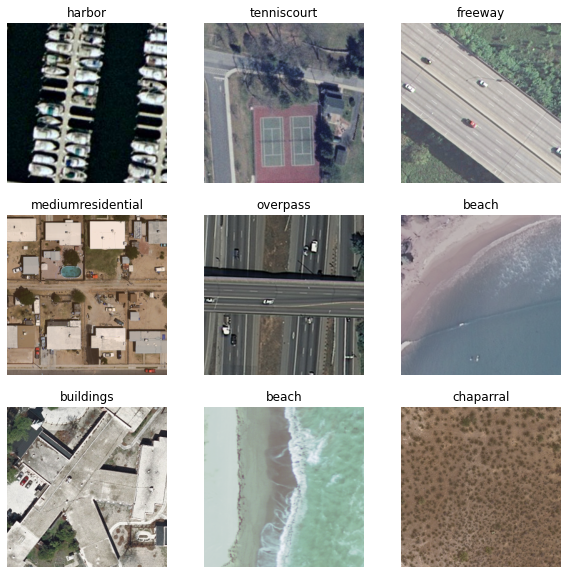

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1): # how to print pictures of a batch
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    print(images[i].shape)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:

for x in train_set.take(1): # how to print pictures of a batch
  print(x)

(<tf.Tensor: shape=(32, 32, 256, 256, 3), dtype=uint8, numpy=
array([[[[[ 16,  18,  15],
          [  2,   5,   3],
          [  2,   7,   4],
          ...,
          [ 58,  54,  65],
          [123, 118, 129],
          [190, 185, 194]],

         [[  2,   4,   2],
          [  1,   3,   0],
          [  0,   4,   1],
          ...,
          [ 48,  42,  53],
          [126, 120, 132],
          [198, 192, 202]],

         [[  1,   3,   0],
          [  3,   7,   2],
          [  3,   8,   3],
          ...,
          [ 45,  41,  51],
          [119, 115, 126],
          [186, 182, 191]],

         ...,

         [[122, 126, 113],
          [113, 117, 105],
          [104, 108,  97],
          ...,
          [172, 171, 167],
          [181, 179, 177],
          [195, 194, 194]],

         [[180, 184, 169],
          [174, 178, 164],
          [169, 173, 160],
          ...,
          [104,  99,  96],
          [115, 109, 107],
          [131, 126, 126]],

         [[195, 199, 184],
 

In [ ]:
import tensorflow as tf
from tensorflow import keras

base_model = keras.applications.xception.Xception(weights="imagenet",
                                                  include_top=False)
avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(n_classes, activation="softmax")(avg)
model = keras.models.Model(inputs=base_model.input, outputs=output)

83689472/83683744 [==============================] - 3s 0us/step


In [ ]:

class_names

In [ ]:
import tensorflow as tf
from tensorflow import keras
from functools import partial

def central_crop(image):
    shape = tf.shape(image)
    min_dim = tf.reduce_min([shape[0], shape[1]])
    top_crop = (shape[0] - min_dim) // 4
    bottom_crop = shape[0] - top_crop
    left_crop = (shape[1] - min_dim) // 4
    right_crop = shape[1] - left_crop
    return image[top_crop:bottom_crop, left_crop:right_crop]

def random_crop(image):
    shape = tf.shape(image)
    min_dim = tf.reduce_min([shape[0], shape[1]]) * 90 // 100
    return tf.image.random_crop(image, [min_dim, min_dim, 3])

def preprocess(image, label, randomize=False):
    if randomize:
        print("yjiotrio")
    else:
        cropped_image = central_crop(image)
    resized_image = tf.image.resize(cropped_image, [224, 224])
    final_image = keras.applications.xception.preprocess_input(resized_image)
    return final_image, label

train_set = train_ds.shuffle(1000).repeat()
train_set = train_ds.map(preprocess).prefetch(1)
valid_set = valid_ds.map(preprocess).prefetch(1)
test_set = test_ds.map(preprocess).prefetch(1)

base_model = keras.applications.xception.Xception(weights="imagenet",
                                                  include_top=False)
avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(n_classes, activation="softmax")(avg)
model = keras.models.Model(inputs=base_model.input, outputs=output)

for layer in base_model.layers:
    layer.trainable = False

optimizer = keras.optimizers.SGD(lr=0.2, momentum=0.9, decay=0.01)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])

history = model.fit(train_set,
                  
                    validation_data=valid_set,
          
                    epochs=5)

Epoch 1/5
53/53 [==============================] - 11s 205ms/step - loss: 0.9693 - accuracy: 0.7286 - val_loss: 0.4668 - val_accuracy: 0.8905
Epoch 2/5
53/53 [==============================] - 9s 177ms/step - loss: 0.2520 - accuracy: 0.9190 - val_loss: 0.1983 - val_accuracy: 0.9429
Epoch 3/5
53/53 [==============================] - 9s 179ms/step - loss: 0.0771 - accuracy: 0.9756 - val_loss: 0.2541 - val_accuracy: 0.9333
Epoch 4/5
53/53 [==============================] - 9s 178ms/step - loss: 0.0238 - accuracy: 0.9958 - val_loss: 0.2430 - val_accuracy: 0.9286
Epoch 5/5
53/53 [==============================] - 9s 177ms/step - loss: 0.0183 - accuracy: 0.9970 - val_loss: 0.2111 - val_accuracy: 0.9238


In [ ]:
for layer in base_model.layers:
    layer.trainable = True

optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9,
                                 nesterov=True, decay=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit(train_set,

                    validation_data=valid_set,

                    epochs=40)

Epoch 1/40
      2/Unknown - 1s 383ms/step - loss: 0.5899 - accuracy: 0.8281WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.1801s vs `on_train_batch_end` time: 0.5836s). Check your callbacks.


53/53 [==============================] - 44s 827ms/step - loss: 0.2999 - accuracy: 0.9077 - val_loss: 0.7573 - val_accuracy: 0.8667
Epoch 2/40
53/53 [==============================] - 44s 826ms/step - loss: 0.0273 - accuracy: 0.9946 - val_loss: 0.2295 - val_accuracy: 0.9476
Epoch 3/40
53/53 [==============================] - 43s 804ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.1927 - val_accuracy: 0.9571
Epoch 4/40
53/53 [==============================] - 43s 808ms/step - loss: 5.3624e-04 - accuracy: 1.0000 - val_loss: 0.1567 - val_accuracy: 0.9667
Epoch 5/40
53/53 [==============================] - 43s 813ms/step - loss: 4.3167e-04 - accuracy: 1.0000 - val_loss: 0.1431 - val_accuracy: 0.9714
Epoch 6/40
53/53 [==============================] - 43s 809ms/step - loss: 3.6977e-04 - accuracy: 1.0000 - val_loss: 0.1358 - val_accuracy: 0.9714
Epoch 7/40
53/53 [==============================] - 42s 800ms/step - loss: 3.2706e-04 - accuracy: 1.0000 - val_loss: 0.1320 - val_accuracy: 0